In [115]:
import numpy as np
import Roster
import matplotlib.pyplot as plt
import math
import random

In [20]:
class Evolutionary():
    def __init__(self,pop, mprob, rprob, geneSize, fitnessFunction):
        self.pop = np.zeros((pop,geneSize,2))
        self.mutatProb = mprob
        self.recomProb = rprob
        self.geneSize = geneSize
        self.fitnessFunction = fitnessFunction
        
        self.populate()
    
    def populate(self):
        for i in range(len(self.pop)):
            prob = [5/self.geneSize, (self.geneSize-10)/self.geneSize,5/self.geneSize]
            newTeam = np.random.choice([-1,0,1], self.geneSize, p=prob)
            newRole = np.random.choice([0,1,2,3,4], self.geneSize)
            for j in range(self.geneSize):
                self.pop[i][j][0] = newTeam[j]
                self.pop[i][j][1] = newRole[j]
        self.fixUsing()
        return
    
    def step(self):
        a = np.random.randint(len(self.pop))
        b = np.random.randint(len(self.pop))
        while(a != b):
            b = np.random.randint(len(self.pop))
        if self.fitnessFunction(self.pop[a]) > self.fitnessFunction(self.pop[b]):
            winner = a
            loser = b
        else:
            winner = b
            loser = a
        
        for i in range(self.geneSize):
            if(np.random.random_sample() > self.recomProb):
                self.pop[loser][i][0] = self.pop[winner][i][0]
            if(np.random.random_sample() > self.recomProb):
                self.pop[loser][i][1] = self.pop[winner][i][1]
        for i in range(self.geneSize):
            if(np.random.random_sample() > self.mutatProb):
                prob = [5/self.geneSize, (self.geneSize-10)/self.geneSize,5/self.geneSize]
                newTeam = np.random.choice([-1,0,1], p=prob)
                newRole = np.random.choice([0,1,2,3,4])
                new = [newTeam, newRole]
                self.pop[loser][i][0] = new[0]
                self.pop[loser][i][1] = new[1]
                
        self.fixUsing()
    def best(self):
        best = 10000000
        for i in self.pop:
            fitness = self.fitnessFunction(i)
            if fitness < best:
                best = fitness
        return best

In [21]:
roster = Roster.oRoster("c")
sample = np.random.choice(list(roster.keys()), 15)

def fit(genotype):
    Atotal = 0
    Btotal = 0
    
    Ahappiness = 0
    Bhappiness = 0
    
    totalHappiness = 0
    
    for i in range(len(sample)):
        if genotype[i][0] == -1:
            Atotal += roster[sample[i]][0]
            Ahappiness += 5 - roster[sample[i]][1].index(genotype[i][1])
        elif genotype[i][0] == 1:
            Btotal += roster[sample[i]][0]
            Bhappiness += 5 - roster[sample[i]][1].index(genotype[i][1])
        if genotype[i][0] != 0: 
            totalHappiness += 5 - roster[sample[i]][1].index(genotype[i][1])
    
    happinessDifferenceWeighted = abs(Ahappiness - Bhappiness) * 100
    weightedTotalHappiness = totalHappiness * 100
    totalDifference = abs(Atotal - Btotal)
    
    weightedOutput = totalDifference + happinessDifferenceWeighted - totalDifference
    
    return weightedOutput

pop = 20
mprob = 0.1
rprob = 0.5
genesize = 10
sampleSize = len(sample)
fitness = fit
duration = 10


    
best = np.zeros(duration)
balance = Evolutionary(pop, mprob, rprob, genesize, fitness)

for i in range(duration):
    balance.step()
    best[i] = balance.best()

plt.plot(best)
plt.xlabel("Time")
plt.ylabel("Best Fitness")
plt.show()
        


AttributeError: 'Evolutionary' object has no attribute 'fixUsing'

In [157]:
def legal(genotype):
    seen = []
    for i in genotype:
        if i in seen:
            return False
        seen.append(i)
    return True

class Evolutionary():
    def __init__(self,pop, mprob, rprob, geneSize, fitnessFunction, sampleSize):
        self.pop = np.zeros((pop,geneSize))
        self.mutatProb = mprob
        self.recomProb = rprob
        self.geneSize = geneSize
        self.fitnessFunction = fitnessFunction
        self.sampleSize = sampleSize
        
        self.populate()
    
    def populate(self):
        for i in range(len(self.pop)):
            new = list(range(self.geneSize))
            random.shuffle(new)
            for j in range(self.geneSize):
                self.pop[i][j] = new[j]
        return
            
    def step(self):
        a = np.random.randint(len(self.pop))
        b = np.random.randint(len(self.pop))
        while(a == b):
            b = np.random.randint(len(self.pop))
        if self.fitnessFunction(self.pop[a]) > self.fitnessFunction(self.pop[b]):
            winner = a
            loser = b
        else:
            winner = b
            loser = a
        while True:
            new = (self.pop[loser]).copy()
            for i in range(self.geneSize):
                chance = np.random.random()
                #print(chance)
                if(chance > self.recomProb):
                    new[i] = self.pop[winner][i]
            if legal(new):
                for j in range(self.geneSize):
                    self.pop[loser][j] = new[j]
                break                
        for i in range(self.geneSize):
            if np.random.random() > self.mutatProb:
                self.pop[loser][i] = self.sampleSize - self.pop[loser][i] - 1
    def best(self):
        best = 10000000
        for i in self.pop:
            fitness = self.fitnessFunction(i)
            if fitness < best:
                best = fitness
        return best

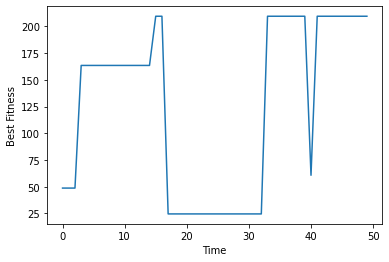

In [159]:
roster = Roster.oRoster("c")
sample = np.random.choice(list(roster.keys()), 15)

def fit(genotype):
    Atotal = 0
    Btotal = 0
    
    if legal(genotype):
        for i in range(10):
            if i < 5:
                Atotal += roster[sample[int(genotype[i])]][0]
                    
            else:
                Btotal += roster[sample[int(genotype[i])]][0]
        totalDifference = abs(Atotal - Btotal)
    else:
        totalDifference = 10000000
        
    return totalDifference


pop = 30
mprob = 0.1
rprob = 0.5
genesize = 10
sampleSize = len(sample)
fitness = fit
duration = 50


    
best = np.zeros(duration)
balance = Evolutionary(pop, mprob, rprob, genesize, fitness, sampleSize)

for i in range(duration):
    balance.step()
    best[i] = balance.best()

plt.plot(best)
plt.xlabel("Time")
plt.ylabel("Best Fitness")
plt.show()
        
